In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("S:/project/light_spotify_dataset.csv")
df

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [4]:
df1=df.copy()
pd.reset_option("display.max_row")
df1.columns = df1.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [5]:
print(df1.isnull().sum())
df1.describe()

artist              0
song                8
emotion             0
variance            0
genre               0
release_date        0
key                 0
tempo               0
loudness            0
explicit            0
popularity          0
energy              0
danceability        0
positiveness        0
speechiness         0
liveness            0
acousticness        0
instrumentalness    0
dtype: int64


,variance,release_date,tempo,loudness,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness
count,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000
mean,0.658932,2008.472826,120.609685,-8.038657,40.003705,62.369166,59.127492,47.656966,11.748042,19.905333,26.156194,5.440052
std,0.320735,14.756158,28.966358,3.842215,18.770245,22.083376,17.069117,23.801800,12.443653,16.551294,29.047331,17.662526
min,-1.000000,1900.000000,33.000000,-46.770000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.833514,2002.000000,97.000000,-9.890000,27.000000,48.000000,48.000000,29.000000,4.000000,10.000000,2.000000,0.000000
50%,0.833514,2015.000000,120.000000,-7.190000,39.000000,64.000000,60.000000,47.000000,6.000000,13.000000,14.000000,0.000000
75%,0.833514,2019.000000,140.000000,-5.370000,52.000000,80.000000,72.000000,66.000000,16.000000,25.000000,44.000000,0.000000
max,1.000000,2024.000000,200.000000,3.740000,100.000000,100.000000,99.000000,99.000000,97.000000,100.000000,100.000000,100.000000


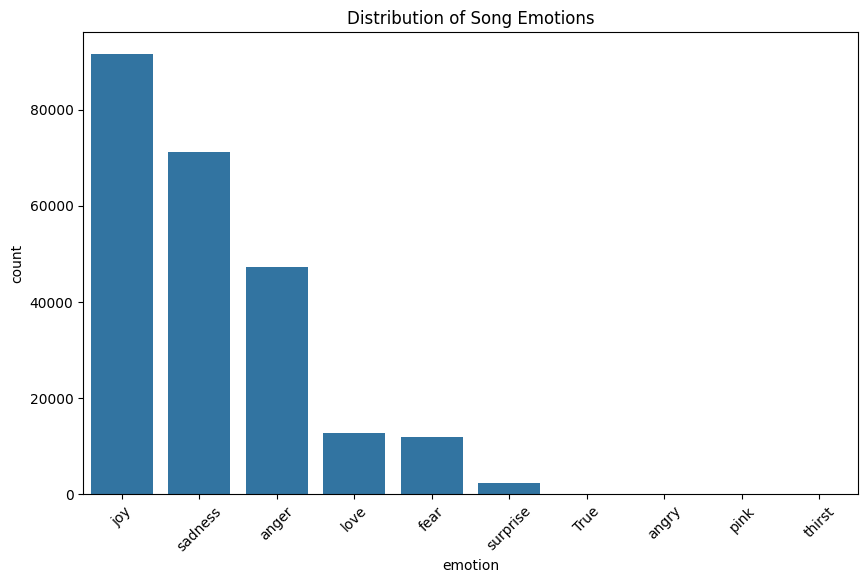

In [6]:
# Emotion Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='emotion',order=df['emotion'].value_counts().index)
plt.title('Distribution of Song Emotions')
plt.xticks(rotation=45)
plt.show()

In [8]:
df1['emotion'] = df1['emotion'].replace('angry', 'anger')

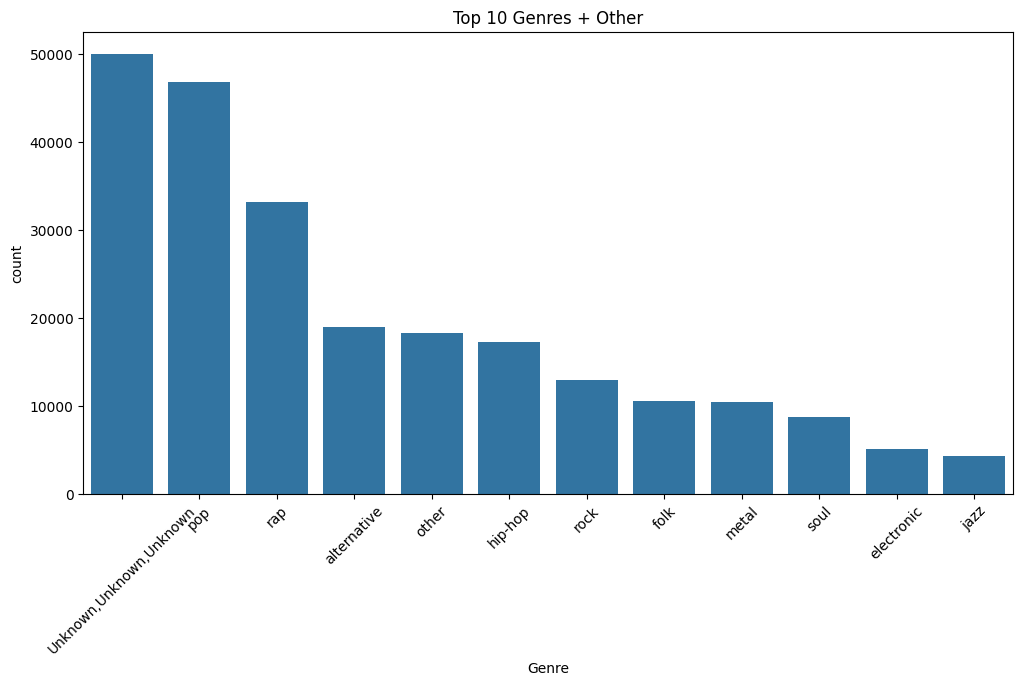

In [9]:
# Genre Distribution
top_genres = df['Genre'].value_counts().nlargest(11).index
df['Genre']=df['Genre'].apply(lambda x: x if x in top_genres else 'other')

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

Genre
other          0.288120
pop            0.197829
rap            0.140108
alternative    0.080380
hip-hop        0.073071
rock           0.054669
folk           0.044812
metal          0.044268
soul           0.036884
electronic     0.021706
jazz           0.018153
Name: proportion, dtype: float64


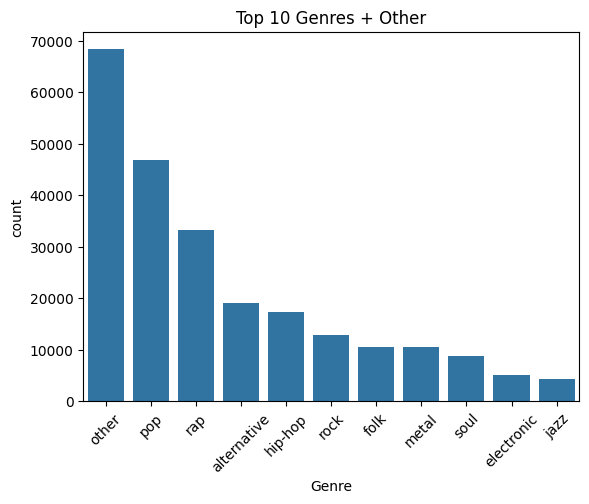

In [10]:
df['Genre']=df['Genre'].replace('Unknown,Unknown,Unknown','other')
print(df['Genre'].value_counts(normalize=True))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

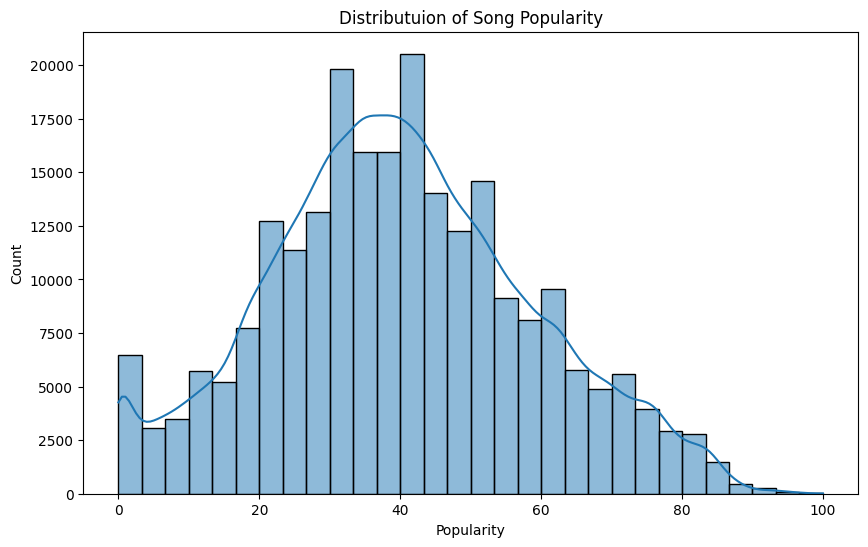

In [12]:
# Popularity Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'],bins=30, kde=True)
plt.title('Distributuion of Song Popularity')
plt.show()

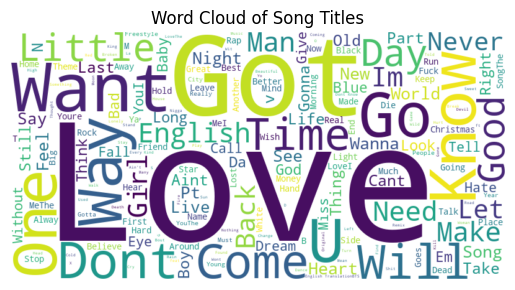

In [16]:
#word Cloud of Song Titles

from wordcloud import WordCloud

text =''.join(df['song'].dropna())

wordcloud = WordCloud(width=800,height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Titles')
plt.axis('off')
plt.show()

In [35]:
# Emotion-Based Song Recommender



import difflib

# A fuzzy matching function 
def fuzzy_match_emotion(user_input, valid_emotions):
    closest = difflib.get_close_matches(user_input, valid_emotions, n=1, cutoff=0.5)
    return closest[0] if closest else None

# Alias conversion, fuzzy matching, and fallback mechanism
def recommend_by_emotion_fuzzy(emotion_label, top_n=10):
    #  Alias mapping table

    emotion_aliases = {
        'happy': 'joy',
        'cheerful': 'joy',
        'romance': 'love',
        'romantic': 'love',
        'depressed': 'sadness',
        'mad': 'anger',
        'rage': 'anger',
        'relax': 'joy',
        'chill': 'joy',
        'cry': 'sadness'
    }

    valid_emotions = df['emotion'].unique().tolist()

    # Alias conversion
    if emotion_label in emotion_aliases:
        emotion_label = emotion_aliases[emotion_label]

    # Handling null values
    if not emotion_label:
        print("No emotion specified. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    # Fuzzy matching: Find the closest valid emotion.
    matched_emotion = fuzzy_match_emotion(emotion_label, valid_emotions)

    if not matched_emotion:
        print(f"No close match for emotion: '{emotion_label}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    # Normally recommend the most popular songs under that emotion.
    filtered = df[df['emotion'] == matched_emotion]

    if filtered.empty:
        print(f"No songs found for emotion: '{matched_emotion}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    print(f"Showing songs for emotion: '{matched_emotion}'")
    top_songs = filtered.sort_values(by='Popularity', ascending=False).head(top_n)
    return top_songs[['song', 'artist', 'Genre', 'Popularity']]

In [37]:
recommend_by_emotion_fuzzy('happy')

Showing songs for emotion: 'joy'


,song,artist,Genre,Popularity
219931,Lifetime,Ben&Ben,other,100
219937,Doors,Ben&Ben,other,100
219936,War,Ben&Ben,other,100
219939,Limasawa Street,Ben&Ben,other,100
219932,Make It With You,Ben&Ben,other,100
219933,Fall,Ben&Ben,other,100
219928,Maybe The Night,Ben&Ben,other,100
223443,Never Gonna Regret U,BEAUZ & SIIGHTS,other,99
181895,Stripes Like Burberry,Future & Lil Uzi Vert,other,96
181887,Mink Flow,Future & Young Thug,other,96


In [32]:
# Feature-Based Similarity Recommender
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np


feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']



scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])


# index
song_to_index = pd.Series(df.index, index=df['song']).dropna()



def recommend_similar_songs(song_name, top_n=10):
    if song_name not in song_to_index:
        print(f"Song '{song_name}' not found in dataset. Try another one.")
        return df.sample(n=top_n)[['song','artist','Genre','Popularity']]
    
    idx = song_to_index[song_name]
    target_vector = X_scaled[idx].reshape(1, -1)
    sim_scores = cosine_similarity(target_vector, X_scaled)[0]

    top_indices = np.argsort(sim_scores)[::-1]  # 由大到小
    top_indices = top_indices[top_indices != idx][:top_n]


    return df.iloc[top_indices][['song', 'artist', 'Genre', 'Popularity']]


In [33]:
recommend_similar_songs('Bang-A-Boomerang')

,song,artist,Genre,Popularity
3,Bang,ABBA,pop,52
18784,Let Me Love You Baby,Stevie Ray Vaughan,rock,46
178135,You,George Harrison,rock,38
14868,The Boy From The Chemist Is Here To See You,Omd,pop,16
79937,Fun House,The Stooges,other,32
51658,There Is A Light That Never Goes Out,Smiths,alternative,83
80053,There Is a Light That Never Goes Out,The Smiths,alternative,82
4200,Twistin' The Night Away,Divine,pop,11
14593,Mechanical Wonder,Ocean Colour Scene,pop,32
221534,One Little Slip,Barenaked Ladies,alternative,46


In [38]:
# User Profile Clustering Recommender
from sklearn.cluster import KMeans

# Still use the previous feature columns
feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']

# The data has already been standardized, so we'll directly use X_scaled.
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the clustering results to the DataFrame
df['cluster'] = cluster_labels

#"Simulate a user preference vector with a preference for high energy and danceability
user_profile = {
    'Energy': 80,
    'Danceability': 85,
    'Positiveness': 70,
    'Tempo': 120,
    'Acousticness': 10,
    'Instrumentalness': 5
}

# Convert to a DataFrame and standardize it
user_df = pd.DataFrame([user_profile])
user_scaled = scaler.transform(user_df)

user_cluster = kmeans.predict(user_scaled)[0]

def recommend_from_cluster(user_cluster, top_n=10):
    subset = df[df['cluster'] == user_cluster]
    return subset.sort_values(by='Popularity', ascending=False).head(top_n)[['song', 'artist', 'Genre', 'Popularity']]

In [39]:
recommend_from_cluster(user_cluster)

,song,artist,Genre,Popularity
88927,​working,Tate McRae & Khalid,other,97
88928,​lie to me,Tate McRae & Ali Gatie,other,97
88931,3am,Tate McRae,other,97
170424,I See Dead People,Iam GreedyBoy,other,97
123017,Hurt Somebody,Noah Kahan & Julia Michaels,other,95
13037,Que Sera!,Miley Cyrus,pop,94
13034,Old Blue Jeans,Miley Cyrus,pop,94
43990,This Is The Life,Miley Cyrus,pop,94
43899,All The Time,Miley Cyrus,pop,94
54372,Sound Siren,Unwritten Law,alternative,94


In [40]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Create binary labels
df['is_joy'] = df['emotion'].apply(lambda x: 1 if x == 'joy' else 0)

# Feature columns
feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']

# feature labels
X = df[feature_cols]
y = df['is_joy']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions" or "Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6112283218701211

Confusion Matrix:
 [[28968     3]
 [18424     3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     28971
           1       0.50      0.00      0.00     18427

    accuracy                           0.61     47398
   macro avg       0.56      0.50      0.38     47398
weighted avg       0.57      0.61      0.46     47398



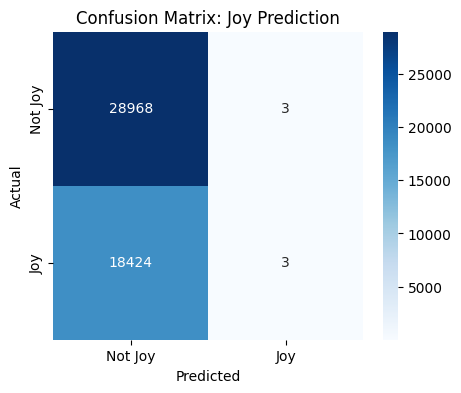

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Joy', 'Joy'], yticklabels=['Not Joy', 'Joy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Joy Prediction')
plt.show()